In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from preprocess import get_prepared_data

In [14]:
# Get the data
X, y = get_prepared_data(oversample=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Create and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions with custom threshold
threshold = 0.4  # Threshold to classify as 1 if probability is greater than or equal to this value
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
y_pred = (y_prob >= threshold).astype(int)

# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Print detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.06      0.10      1822
           1       0.47      0.83      0.60      1822

    accuracy                           0.45      3644
   macro avg       0.36      0.45      0.35      3644
weighted avg       0.36      0.45      0.35      3644



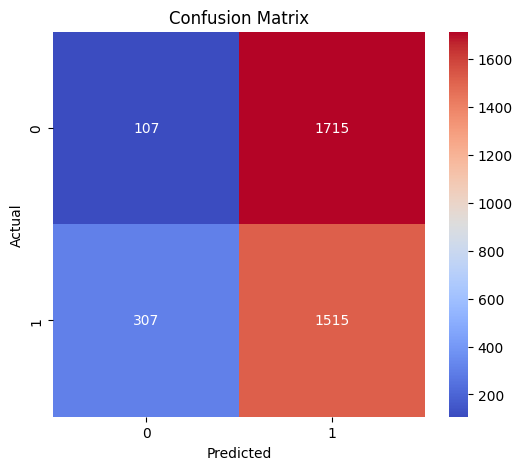

In [16]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True , cmap = "coolwarm",fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test,y_pred)